# Чистка Данных

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Adidas_Another version.csv", sep=";")
data = df
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Unnamed: 13
0,Foot Locker,1185732.0,01.01.2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1 200,$60 000,$300 000,50%,In-store,NaN
1,Foot Locker,1185732.0,02.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",1 000,$50 000,$150 000,30%,In-store,NaN
2,Foot Locker,1185732.0,03.01.2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",1 000,$40 000,$140 000,35%,In-store,NaN
3,Foot Locker,1185732.0,04.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",850,$38 250,$133 875,35%,In-store,NaN
4,Foot Locker,1185732.0,05.01.2020,Northeast,New York,New York,Men's Apparel,"$60,00",900,$54 000,$162 000,30%,In-store,NaN
5,Foot Locker,1185732.0,06.01.2020,Northeast,New York,New York,Women's Apparel,"$50,00",1 000,$50 000,$125 000,25%,In-store,NaN
6,Foot Locker,1185732.0,07.01.2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1 250,$62 500,$312 500,50%,In-store,NaN
7,Foot Locker,1185732.0,08.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",900,$45 000,$135 000,30%,Outlet,NaN
8,Foot Locker,1185732.0,21.01.2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",950,$38 000,$133 000,35%,Outlet,NaN
9,Foot Locker,1185732.0,22.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",825,$37 125,$129 938,35%,Outlet,NaN


In [ ]:
df = data
print(df.columns)
df = df.drop(columns=['Retailer ID', 'Units Sold', 'Operating Profit', 'Operating Margin'], axis=1)

# Оставляем retailer, date, region, product, total sales (прогнозируем), sales method
df = df.drop(columns=['State', 'City'])
df = df.drop('Unnamed: 13', axis=1)
df.head(10)

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Unnamed: 13'],
      dtype='object')


,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,01.01.2020,Northeast,Men's Street Footwear,"$50,00",$60 000,In-store
1,Foot Locker,02.01.2020,Northeast,Men's Athletic Footwear,"$50,00",$50 000,In-store
2,Foot Locker,03.01.2020,Northeast,Women's Street Footwear,"$40,00",$40 000,In-store
3,Foot Locker,04.01.2020,Northeast,Women's Athletic Footwear,"$45,00",$38 250,In-store
4,Foot Locker,05.01.2020,Northeast,Men's Apparel,"$60,00",$54 000,In-store
5,Foot Locker,06.01.2020,Northeast,Women's Apparel,"$50,00",$50 000,In-store
6,Foot Locker,07.01.2020,Northeast,Men's Street Footwear,"$50,00",$62 500,In-store
7,Foot Locker,08.01.2020,Northeast,Men's Athletic Footwear,"$50,00",$45 000,Outlet
8,Foot Locker,21.01.2020,Northeast,Women's Street Footwear,"$40,00",$38 000,Outlet
9,Foot Locker,22.01.2020,Northeast,Women's Athletic Footwear,"$45,00",$37 125,Outlet


In [ ]:
mask_dollar = lambda x: float(str(x).replace("$", "").replace(u"\xa0", "").replace(",", ".").replace(" ", ""))
df["Total Sales"] = df["Total Sales"].apply(mask_dollar)
df["Price per Unit"] = df["Price per Unit"].apply(mask_dollar)
df.head(10)

,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,01.01.2020,Northeast,Men's Street Footwear,50.0,60000.0,In-store
1,Foot Locker,02.01.2020,Northeast,Men's Athletic Footwear,50.0,50000.0,In-store
2,Foot Locker,03.01.2020,Northeast,Women's Street Footwear,40.0,40000.0,In-store
3,Foot Locker,04.01.2020,Northeast,Women's Athletic Footwear,45.0,38250.0,In-store
4,Foot Locker,05.01.2020,Northeast,Men's Apparel,60.0,54000.0,In-store
5,Foot Locker,06.01.2020,Northeast,Women's Apparel,50.0,50000.0,In-store
6,Foot Locker,07.01.2020,Northeast,Men's Street Footwear,50.0,62500.0,In-store
7,Foot Locker,08.01.2020,Northeast,Men's Athletic Footwear,50.0,45000.0,Outlet
8,Foot Locker,21.01.2020,Northeast,Women's Street Footwear,40.0,38000.0,Outlet
9,Foot Locker,22.01.2020,Northeast,Women's Athletic Footwear,45.0,37125.0,Outlet


In [ ]:
df =df.drop("Invoice Date", axis=1)

In [ ]:
data_forgrap = df.copy()

In [ ]:
df = pd.get_dummies(df, columns=["Region", "Retailer", "Sales Method", "Product"], dtype=int)
# for column in ["Region", "Retailer", "Sales Method", "Product"]:
    #df[column] = pd.factorize(df[column])[0]
df.head(10)

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,50.0,60000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,50.0,50000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,40.0,40000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,45.0,38250.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,60.0,54000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5,50.0,50000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,50.0,62500.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
7,50.0,45000.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
8,40.0,38000.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9,45.0,37125.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df2 = df.copy()

#df2 = df2.drop("Price per Unit", axis=1)

df2

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,50.0,60000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,50.0,50000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,40.0,40000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,45.0,38250.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,60.0,54000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,29.0,2407.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9648,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9649,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9650,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 =df2.drop([9651], axis=0)
data_forgrap =data_forgrap.drop([9651], axis=0)

In [ ]:
df2 =df2.drop([9650], axis=0)
data_forgrap =data_forgrap.drop([9650], axis=0)

In [ ]:
df2 =df2.drop([9649], axis=0)
data_forgrap =data_forgrap.drop([9649], axis=0)

In [ ]:
df2 =df2.drop([9648], axis=0)
data_forgrap =data_forgrap.drop([9648], axis=0)

In [ ]:
df2.isna().sum()

Price per Unit                       0
Total Sales                          0
Region_Midwest                       0
Region_Northeast                     0
Region_South                         0
Region_Southeast                     0
Region_West                          0
Retailer_Amazon                      0
Retailer_Foot Locker                 0
Retailer_Kohl's                      0
Retailer_Sports Direct               0
Retailer_Walmart                     0
Retailer_West Gear                   0
Sales Method_In-store                0
Sales Method_Online                  0
Sales Method_Outlet                  0
Product_Men's Apparel                0
Product_Men's Athletic Footwear      0
Product_Men's Street Footwear        0
Product_Women's Apparel              0
Product_Women's Athletic Footwear    0
Product_Women's Street Footwear      0
dtype: int64

In [ ]:
df2 = df2.sample(frac=1).reset_index(drop=True)

# ГРАФИКИ ИЗНАЧАЛЬНЫХ ДАННЫХ

In [ ]:
data_forgrap

,Retailer,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,Northeast,Men's Street Footwear,50.0,60000.0,In-store
1,Foot Locker,Northeast,Men's Athletic Footwear,50.0,50000.0,In-store
2,Foot Locker,Northeast,Women's Street Footwear,40.0,40000.0,In-store
3,Foot Locker,Northeast,Women's Athletic Footwear,45.0,38250.0,In-store
4,Foot Locker,Northeast,Men's Apparel,60.0,54000.0,In-store
...,...,...,...,...,...,...
9643,Foot Locker,Northeast,Men's Apparel,50.0,3200.0,Outlet
9644,Foot Locker,Northeast,Women's Apparel,41.0,4305.0,Outlet
9645,Foot Locker,Northeast,Men's Street Footwear,41.0,7544.0,Outlet
9646,Foot Locker,Northeast,Men's Athletic Footwear,42.0,2940.0,Outlet


<Axes: title={'center': 'Products price distribution'}, ylabel='Frequency'>

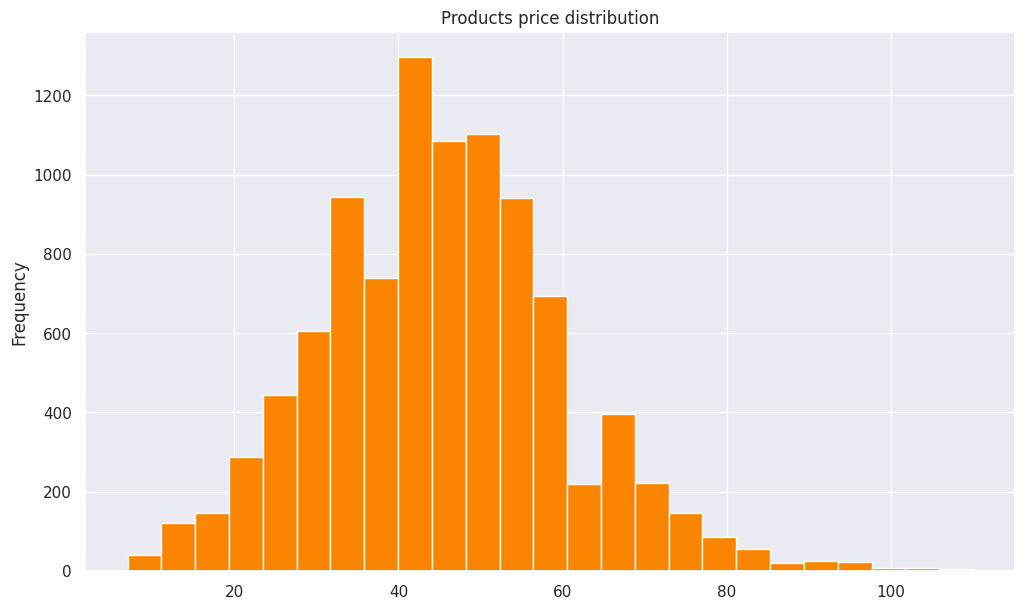

In [ ]:
data_forgrap['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution',color="#FB8500")

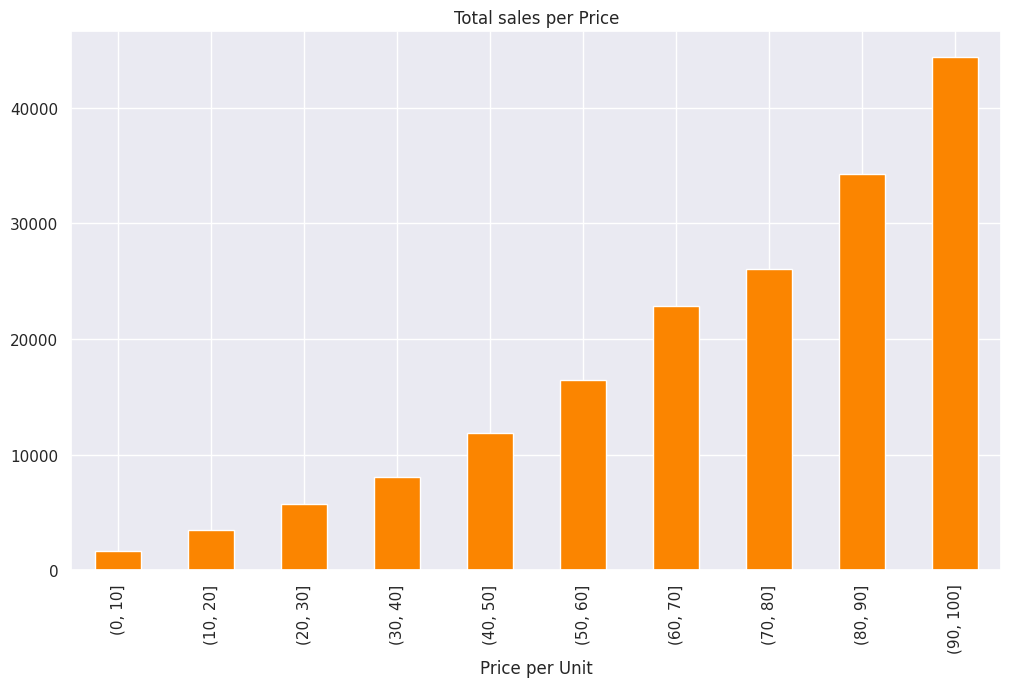

In [ ]:
#top_products= data_forgrap[['Price per Unit','Total Sales']].groupby('Price per Unit').mean()
#top_products.head(10)
#top_products.plot(kind='bar', figsize=(12,7),title='Total sales per Price', color="#FB8500")
#plt.show()
#top_products= data_forgrap[['Price per Unit','Total Sales']].groupby('Price per Unit')
#top_products.head(10)
#top_products.describe()

top_products = data_forgrap.groupby(pd.cut(data_forgrap['Price per Unit'], np.arange(0, 101, 10)))["Total Sales"].mean()
top_products.plot(kind='bar', figsize=(12,7),title='Total sales per Price', color="#FB8500")
plt.show()

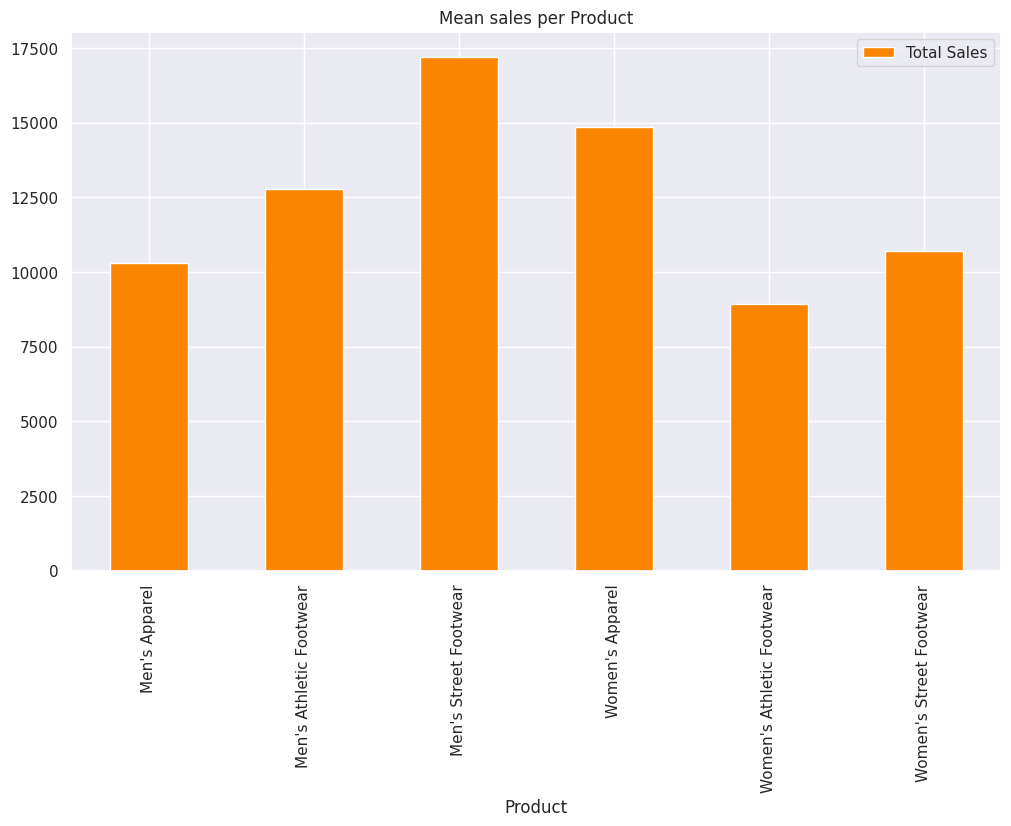

In [ ]:

top_products= data_forgrap[['Product','Total Sales']].groupby('Product').mean()
top_products.plot(kind='bar',figsize=(12,7),title='Mean sales per Product', color="#FB8500")
plt.show()

<Axes: title={'center': 'Top Selling Methods'}, ylabel='Sales Method'>

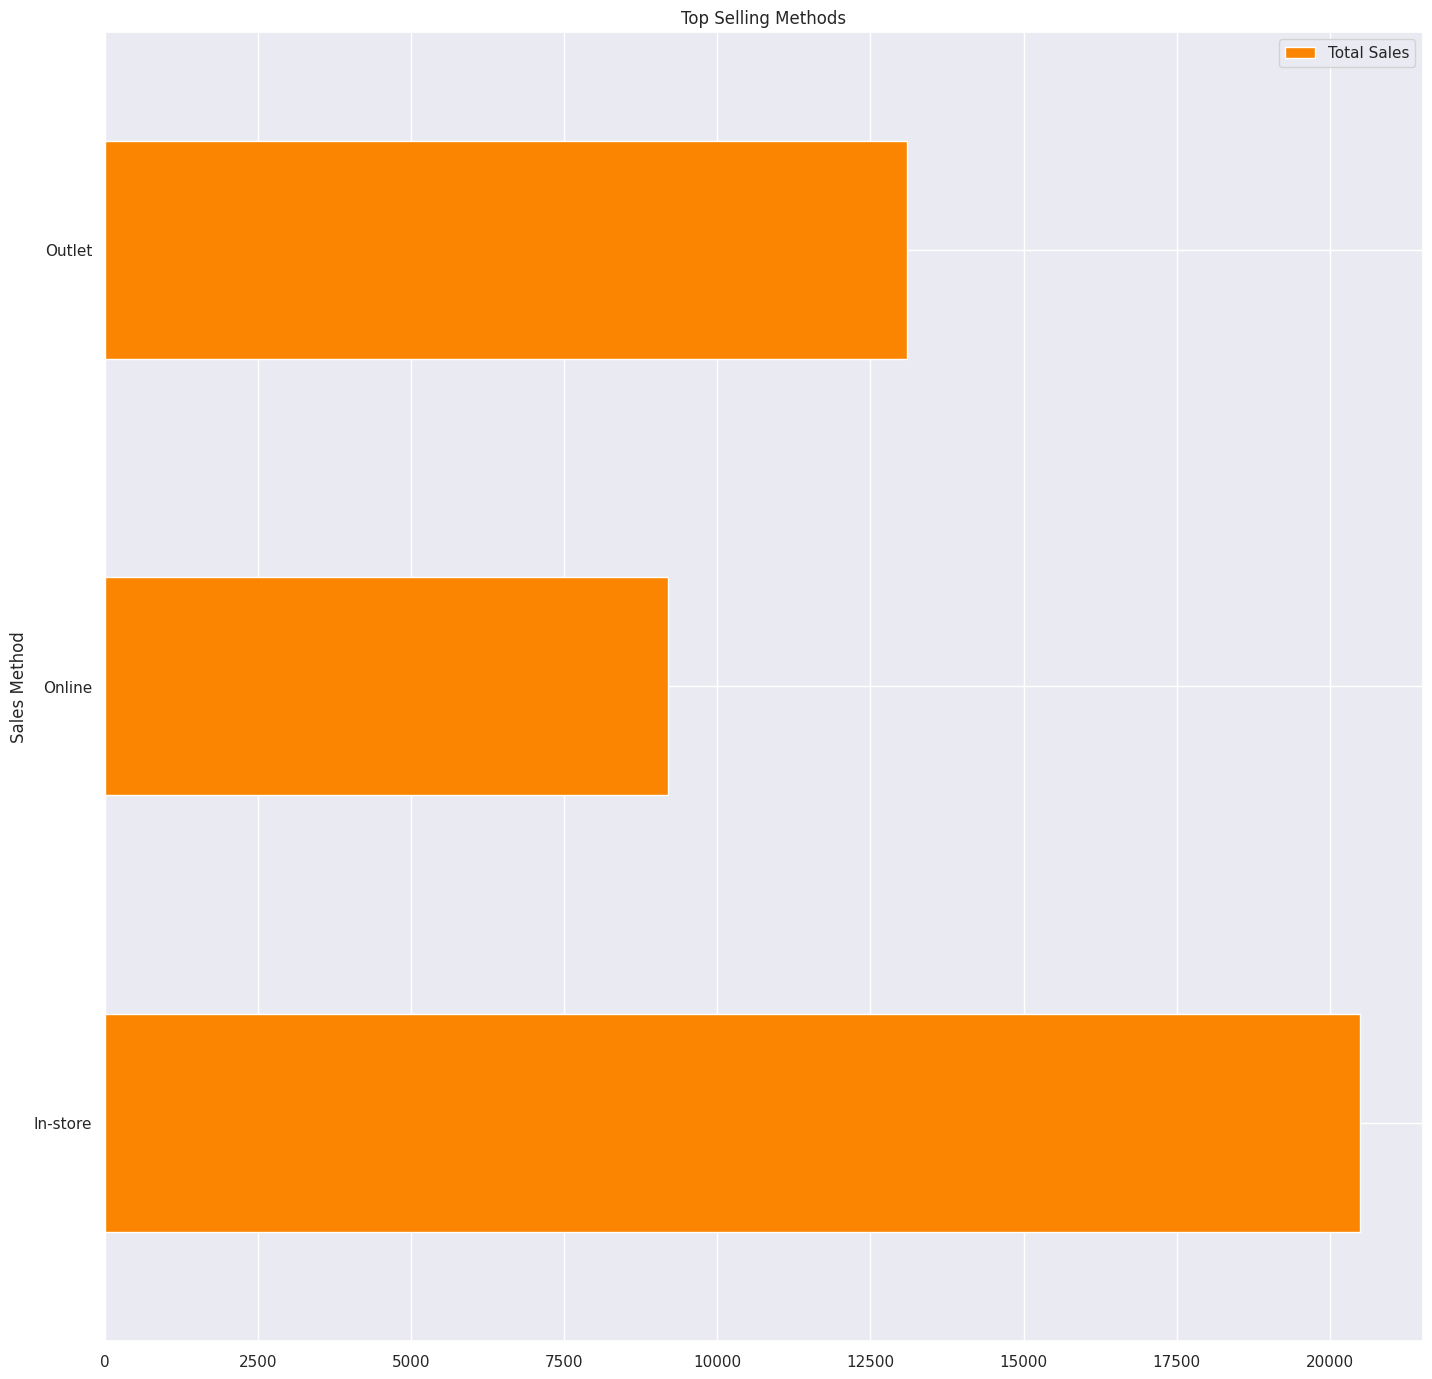

In [ ]:
top_salesmt= data_forgrap[['Sales Method','Total Sales']].groupby('Sales Method').mean()
top_salesmt.plot(kind='barh',title='Top Selling Methods', color="#FB8500")

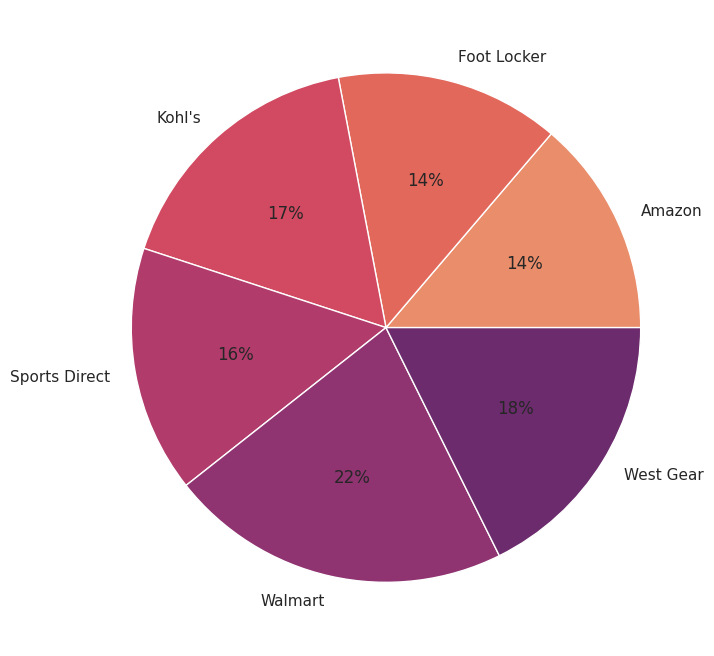

In [ ]:
top_retailers= data_forgrap[['Retailer','Total Sales']].groupby('Retailer').mean()

#top_retailers.plot(kind='pie',subplots=True,figsize=(12,7),title='Total sales per Retailer',autopct='%1.0f%%')

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.pie(top_retailers["Total Sales"], labels = top_retailers.index, colors = sns.color_palette("flare"), autopct='%.0f%%')
plt.show()


<Axes: >

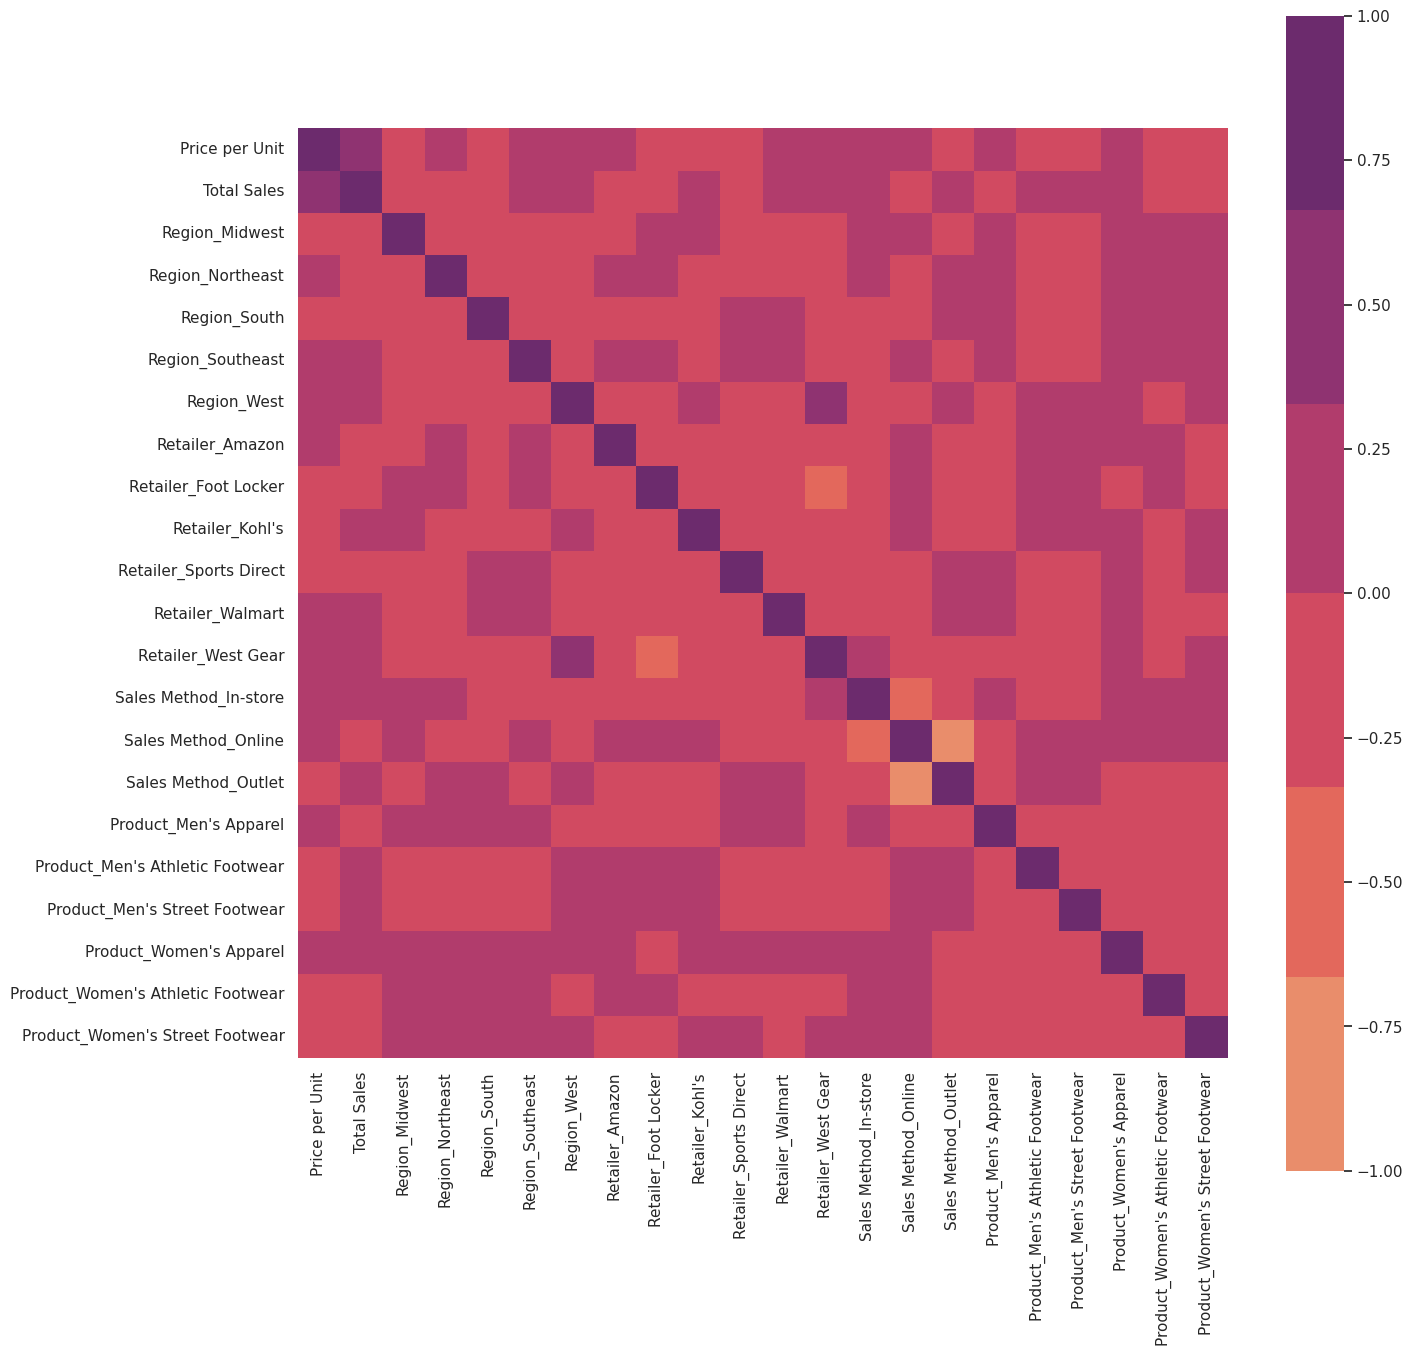

In [ ]:
plt.figure(figsize=(15,15))
corr = df2.corr()
sns.heatmap(corr, cmap=sns.color_palette("flare"), vmin=-1, center=0, square=True)

In [ ]:
import plotly.express as px
fig = px.histogram(df2, x="Price per Unit", title="Distribution of PPU")
fig.show()

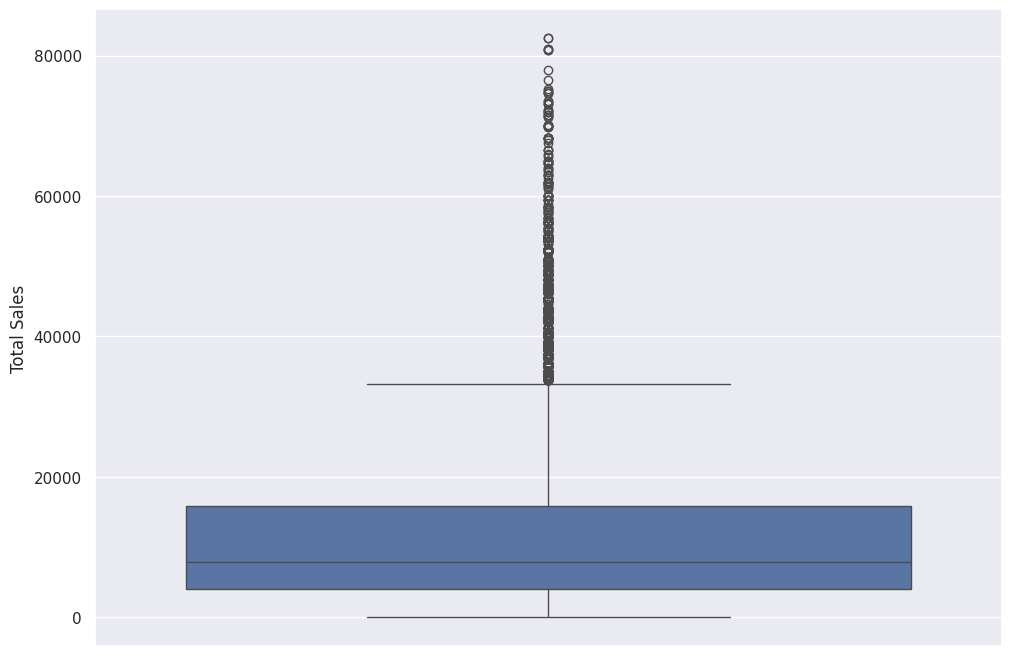

In [ ]:
sns.boxplot(df2["Total Sales"])
sns.set(rc={'figure.figsize':(17, 17)})

# Линейная Регрессия на ненормализированных данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df2

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,35.0,21700.0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,25.0,18000.0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,61.0,7320.0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,43.0,1505.0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,55.0,45375.0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,32.0,2176.0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
9644,37.0,259.0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
9645,46.0,5750.0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
9646,42.0,8820.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
Xlin = df2.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Ylin = df2.values[:, 1]


Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, Ylin, test_size=0.1, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(Xlin_train,ylin_train)
ylin_pred = lr.predict(Xlin_test)


In [ ]:

# Рассчет MSE
mse = np.mean((ylin_test - ylin_pred)**2)

# Рассчет MAPE
mape = np.mean(np.abs((ylin_test - ylin_pred) / ylin_test)) * 100

print("MSE:", mse)
print("MAPE:", mape)
#89.2313454435439

MSE: 78744173.18875876
MAPE: 94.23262361281427


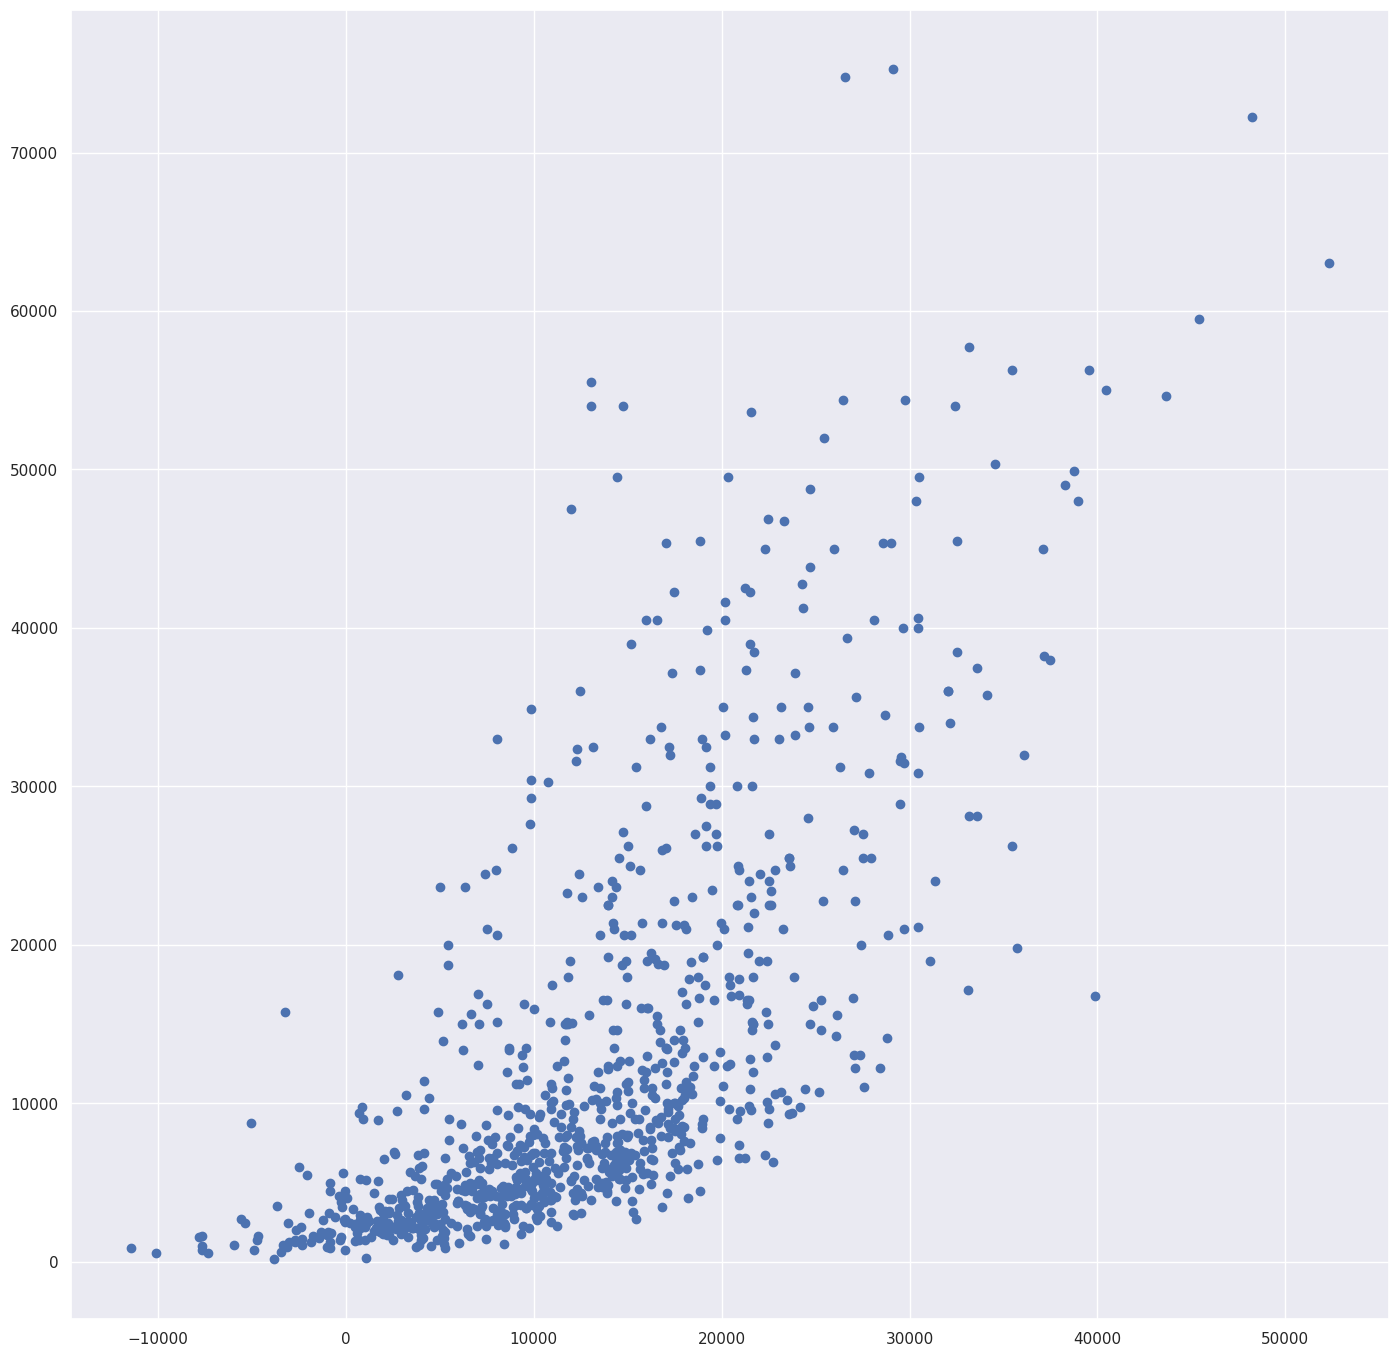

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(ylin_pred, ylin_test)

plt.show()

# Cat BOOST на ненормализированных данных

In [ ]:
Xcat = df2.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Ycat = df2.values[:, 1]


Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(Xcat, Ycat, test_size=0.1, random_state=0)

In [ ]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(Xcat_train, ycat_train)
test_pool = Pool(Xcat_test, ycat_test)

# specify the training parameters
model = CatBoostRegressor(iterations=2500, loss_function='MAE', verbose=100)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predscat = model.predict(test_pool)

0:	learn: 8198.6999242	total: 5.86ms	remaining: 14.6s
100:	learn: 4975.2823528	total: 434ms	remaining: 10.3s
200:	learn: 4561.4266573	total: 753ms	remaining: 8.61s
300:	learn: 4316.5043043	total: 1.1s	remaining: 8.06s
400:	learn: 4083.0619693	total: 1.45s	remaining: 7.6s
500:	learn: 3886.6460835	total: 1.64s	remaining: 6.54s
600:	learn: 3760.0635485	total: 1.83s	remaining: 5.77s
700:	learn: 3660.5084792	total: 2.01s	remaining: 5.15s
800:	learn: 3574.8484129	total: 2.19s	remaining: 4.66s
900:	learn: 3495.8339108	total: 2.39s	remaining: 4.24s
1000:	learn: 3434.5839859	total: 2.58s	remaining: 3.86s
1100:	learn: 3383.4654947	total: 2.77s	remaining: 3.52s
1200:	learn: 3336.9683849	total: 2.96s	remaining: 3.2s
1300:	learn: 3286.6360927	total: 3.14s	remaining: 2.89s
1400:	learn: 3250.3488043	total: 3.33s	remaining: 2.62s
1500:	learn: 3214.4978168	total: 3.51s	remaining: 2.34s
1600:	learn: 3177.0967655	total: 3.69s	remaining: 2.08s
1700:	learn: 3151.4138832	total: 3.88s	remaining: 1.82s
1800:	

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ycat_test, predscat, squared=False)
mae = mean_absolute_error(ycat_test, predscat)
# Рассчет MAPE
mape = np.mean(np.abs((ycat_test - predscat) / ycat_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
#36.75463751878325
#33.75402423022601
#36.615710155370266

MAE: 3527.9628741475603
MAPE: 35.61015758819531
RMSE: 6363.709139537316


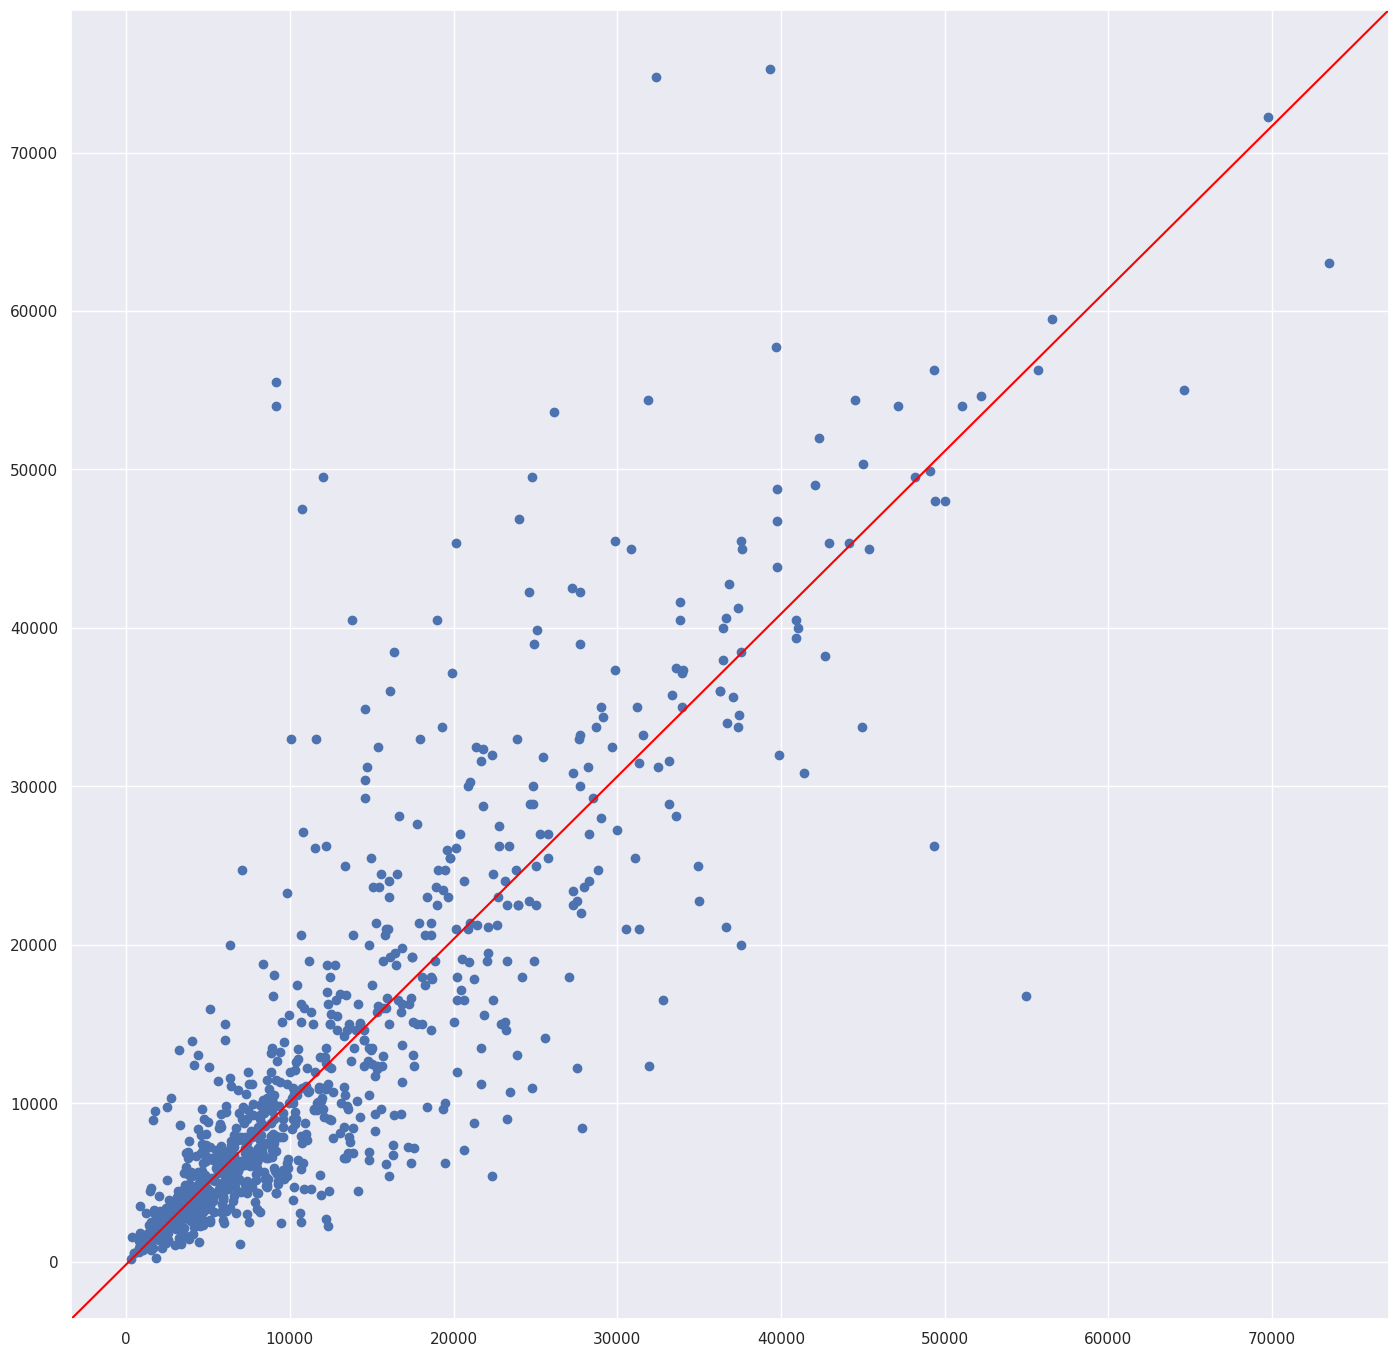

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(predscat,ycat_test)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [ ]:
def calculate_bias(pred, truev):
    # Вычисляем смещение (BIAS) данных относительно среднего значения
    bias = sum(pred - truev) / len(truev)
    return bias

# Пример использования функции
bias = calculate_bias(predscat, ycat_test)
print("BIAS данных:", bias)


BIAS данных: -548.4363052028035


# XG BOOST для НЕнормализированных данных

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import plotly.express as px

In [ ]:
Xgb = df2.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Ygb = df2.values[:, 1]


Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, Ygb, test_size=0.1, random_state=0)

In [ ]:
bst = XGBRegressor(n_estimators=100, max_depth=16, objective='reg:squarederror',eval_metric="rmse")

# fit model
bst.fit(Xgb_train, ygb_train)

predsgb = bst.predict(Xgb_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ygb_test, predsgb, squared=False)
mae = mean_absolute_error(ygb_test, predsgb)
# Рассчет MAPE
mape = np.mean(np.abs((ygb_test - predsgb) / ygb_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
#45.1036560331101
#39.75442084840644
#39.989281025981214

MAE: 3677.7674905569443
MAPE: 44.09313470272754
RMSE: 6685.080666416931


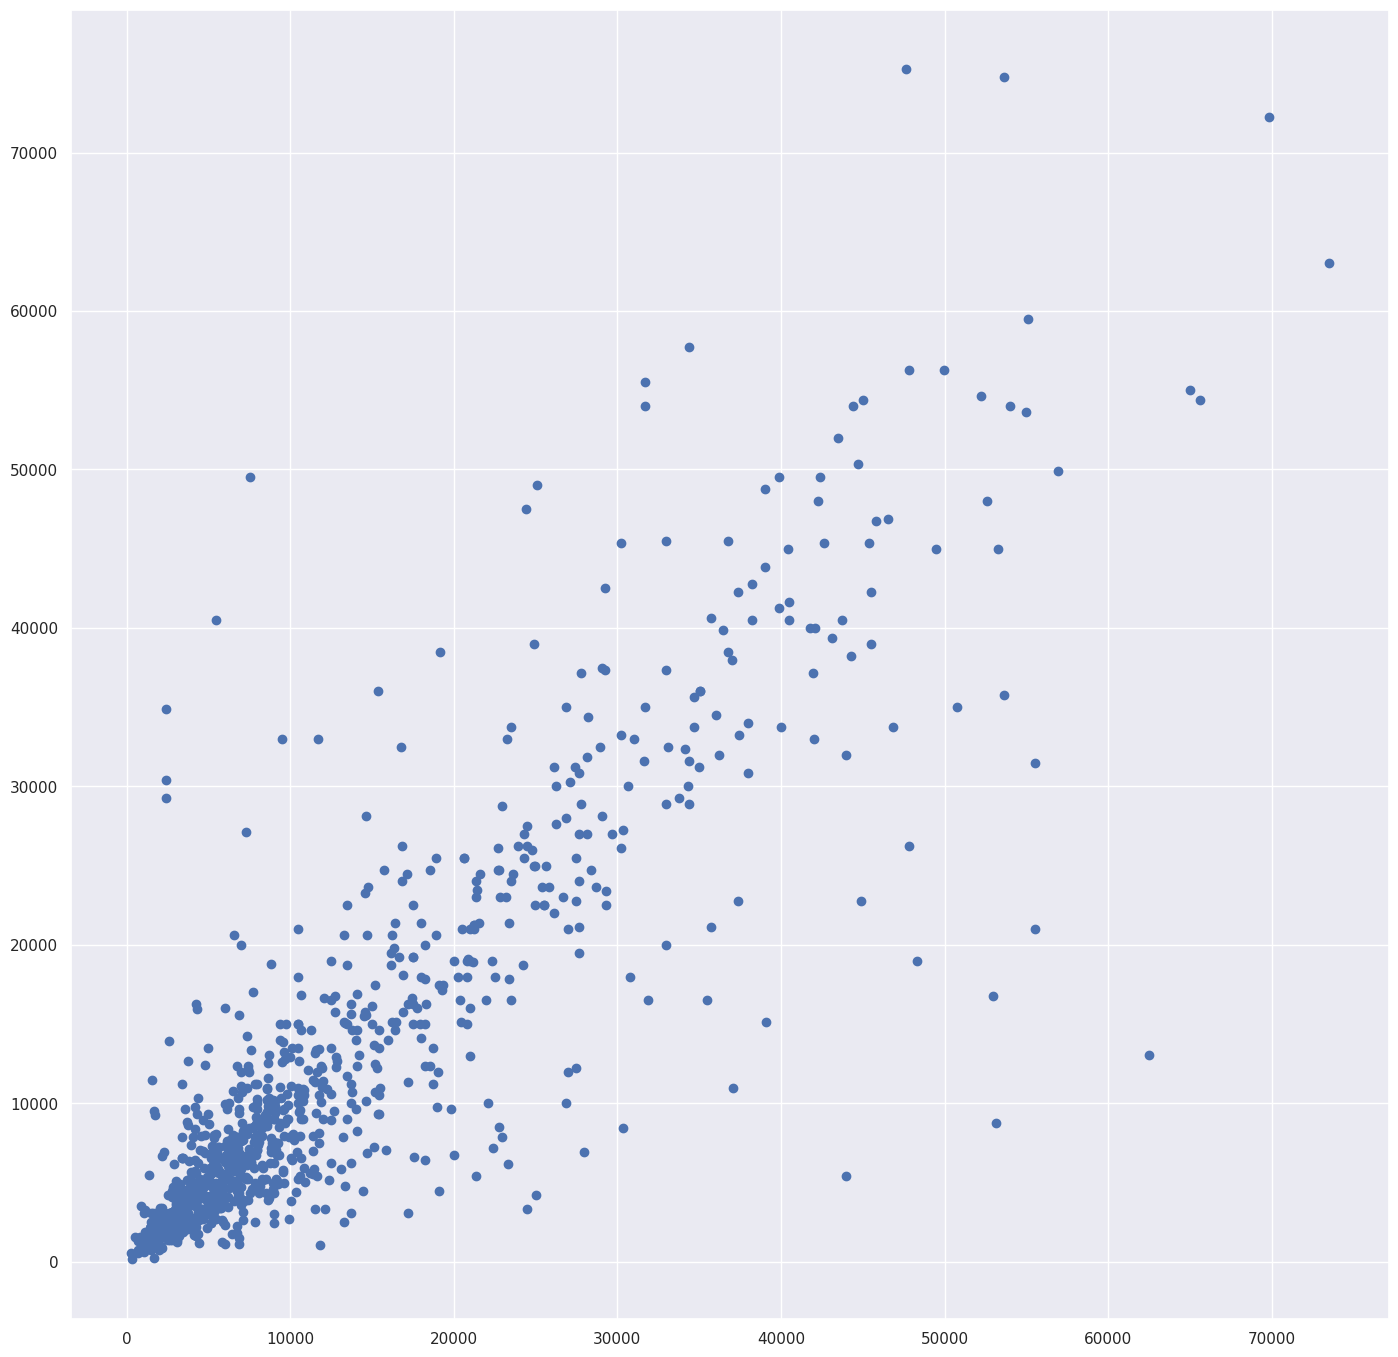

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(predsgb, ygb_test)
plt.show()


# Данные с нормализацией

Данные с нормализацией

In [ ]:
dfn = df2.copy()
dfn["Total Sales"] = 1000 * ((dfn["Total Sales"] - dfn["Total Sales"].min()) / (dfn["Total Sales"].max() - dfn["Total Sales"].min()))
dfn

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,35.0,263.030303,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,25.0,218.181818,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,61.0,88.727273,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,43.0,18.242424,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,55.0,550.000000,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,32.0,26.375758,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
9644,37.0,3.139394,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
9645,46.0,69.696970,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
9646,42.0,106.909091,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
Xn= dfn.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Yn= dfn.values[:, 1]


Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, Yn, test_size=0.15, random_state=1)

# CATBOOST для нормализированных данных

In [ ]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(Xn_train, yn_train)
test_pool = Pool(Xn_test, yn_test)

# specify the training parameters
model = CatBoostRegressor(iterations=2500, loss_function='MAE', verbose=100)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predsn = model.predict(test_pool)

0:	learn: 100.1006295	total: 2.03ms	remaining: 5.06s
100:	learn: 60.5652253	total: 181ms	remaining: 4.3s
200:	learn: 55.2807466	total: 369ms	remaining: 4.21s
300:	learn: 52.2903259	total: 872ms	remaining: 6.37s
400:	learn: 49.4570852	total: 1.41s	remaining: 7.37s
500:	learn: 47.2914255	total: 1.79s	remaining: 7.14s
600:	learn: 45.7184235	total: 2.36s	remaining: 7.46s
700:	learn: 44.3811195	total: 3s	remaining: 7.71s
800:	learn: 43.3340754	total: 3.66s	remaining: 7.76s
900:	learn: 42.4497246	total: 4.13s	remaining: 7.33s
1000:	learn: 41.5706125	total: 4.55s	remaining: 6.82s
1100:	learn: 40.9200571	total: 4.87s	remaining: 6.19s
1200:	learn: 40.3708659	total: 5.3s	remaining: 5.73s
1300:	learn: 39.8448108	total: 5.7s	remaining: 5.25s
1400:	learn: 39.4449101	total: 6.15s	remaining: 4.83s
1500:	learn: 39.1004153	total: 6.75s	remaining: 4.49s
1600:	learn: 38.6542085	total: 7.59s	remaining: 4.26s
1700:	learn: 38.3007221	total: 8.34s	remaining: 3.92s
1800:	learn: 37.9591113	total: 9.12s	remaini

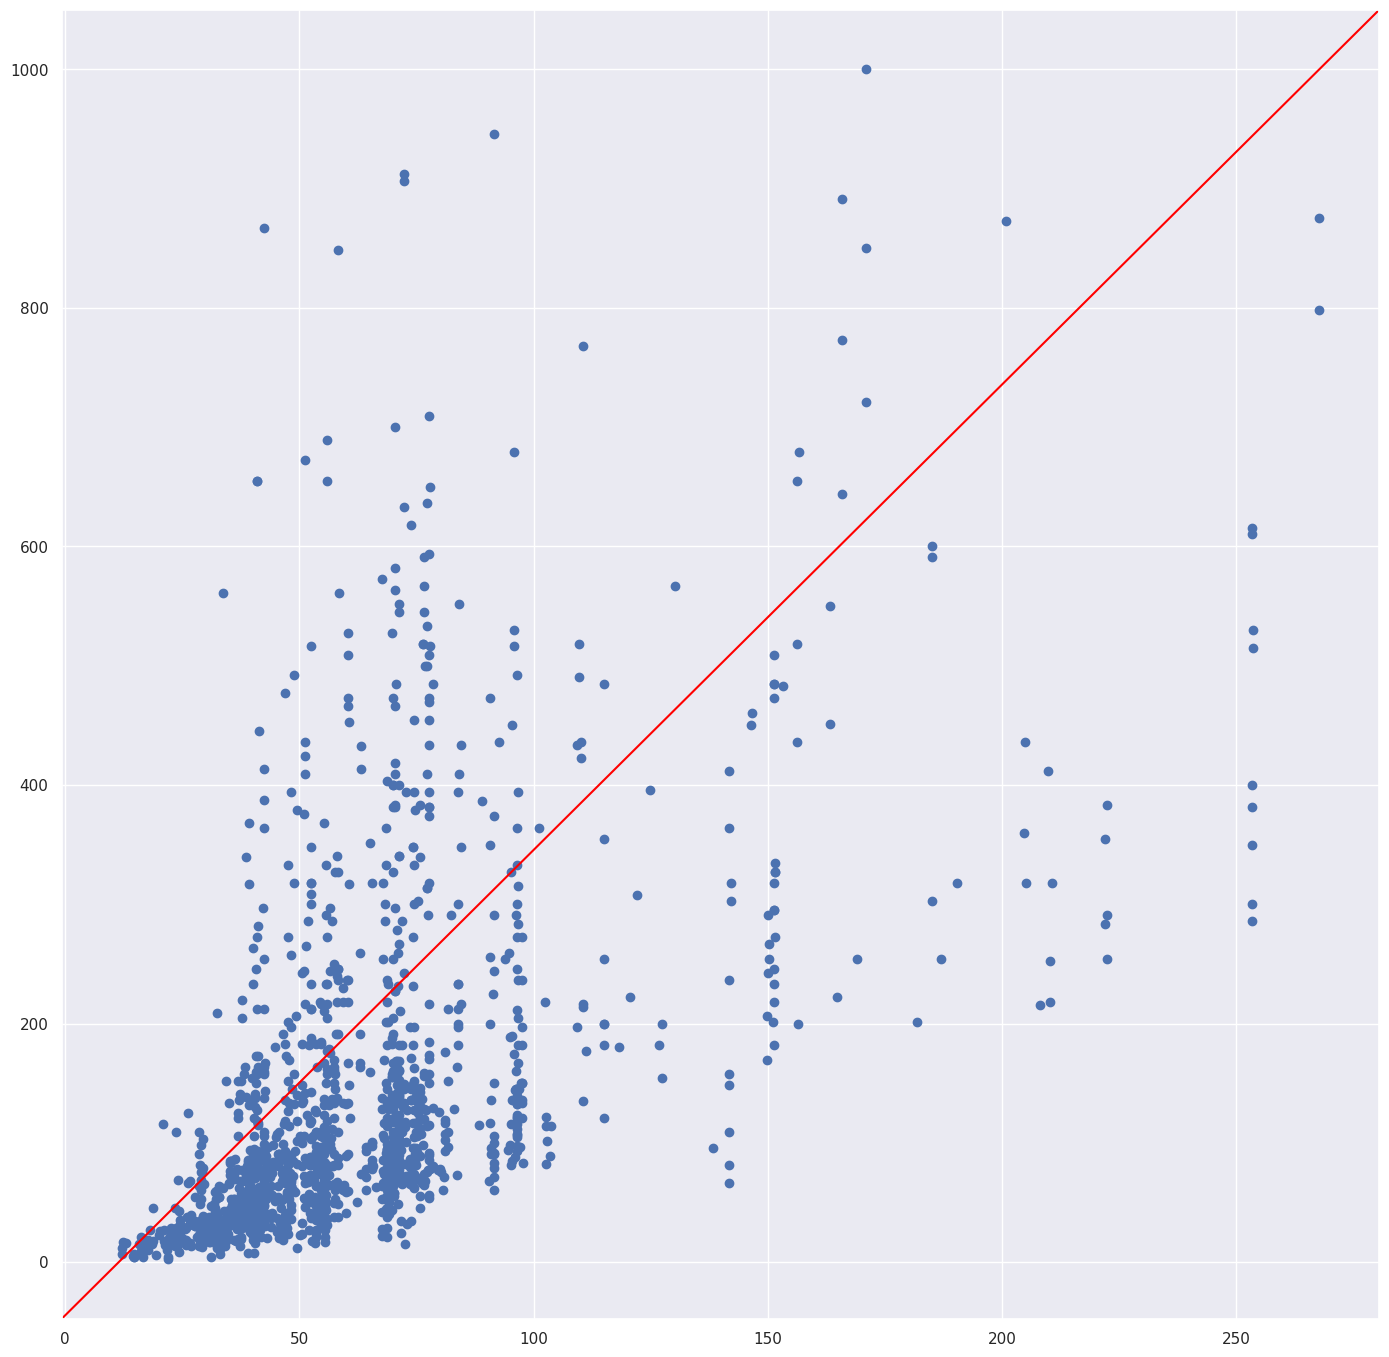

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predsn, yn_test)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(yn_test, predsn, squared=False)
mae = mean_absolute_error(yn_test, predsn)
# Рассчет MAPE
mape = np.mean((np.abs(yn_test - predsn)) / (yn_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
#35.109849965726916
#36.17786197587769
#35.84043296502193

MAE: 88.78766978094761
MAPE: 49.211447473543785
RMSE: 159.41655281287044


In [ ]:
bias = calculate_bias(predsn, yn_test)
print("BIAS данных:", bias)

BIAS данных: -8.382038883018813


# Линейная Регрессия Для нормализированных данных

In [ ]:
lr = LinearRegression()
lr.fit(Xn_train,yn_train)
y_pred = lr.predict(Xn_test)


In [ ]:
# Рассчет MSE
mse = np.mean((yn_test - y_pred)**2)

# Рассчет MAPE
mape = np.mean(np.abs((yn_test - y_pred)) / (yn_test)) * 100

print("MSE:", mse)
print("MAPE:", mape)
#87.54144278462634
#98.21869232813982
#89.93882815686327

MSE: 12063.981433798888
MAPE: 97.37533213641754


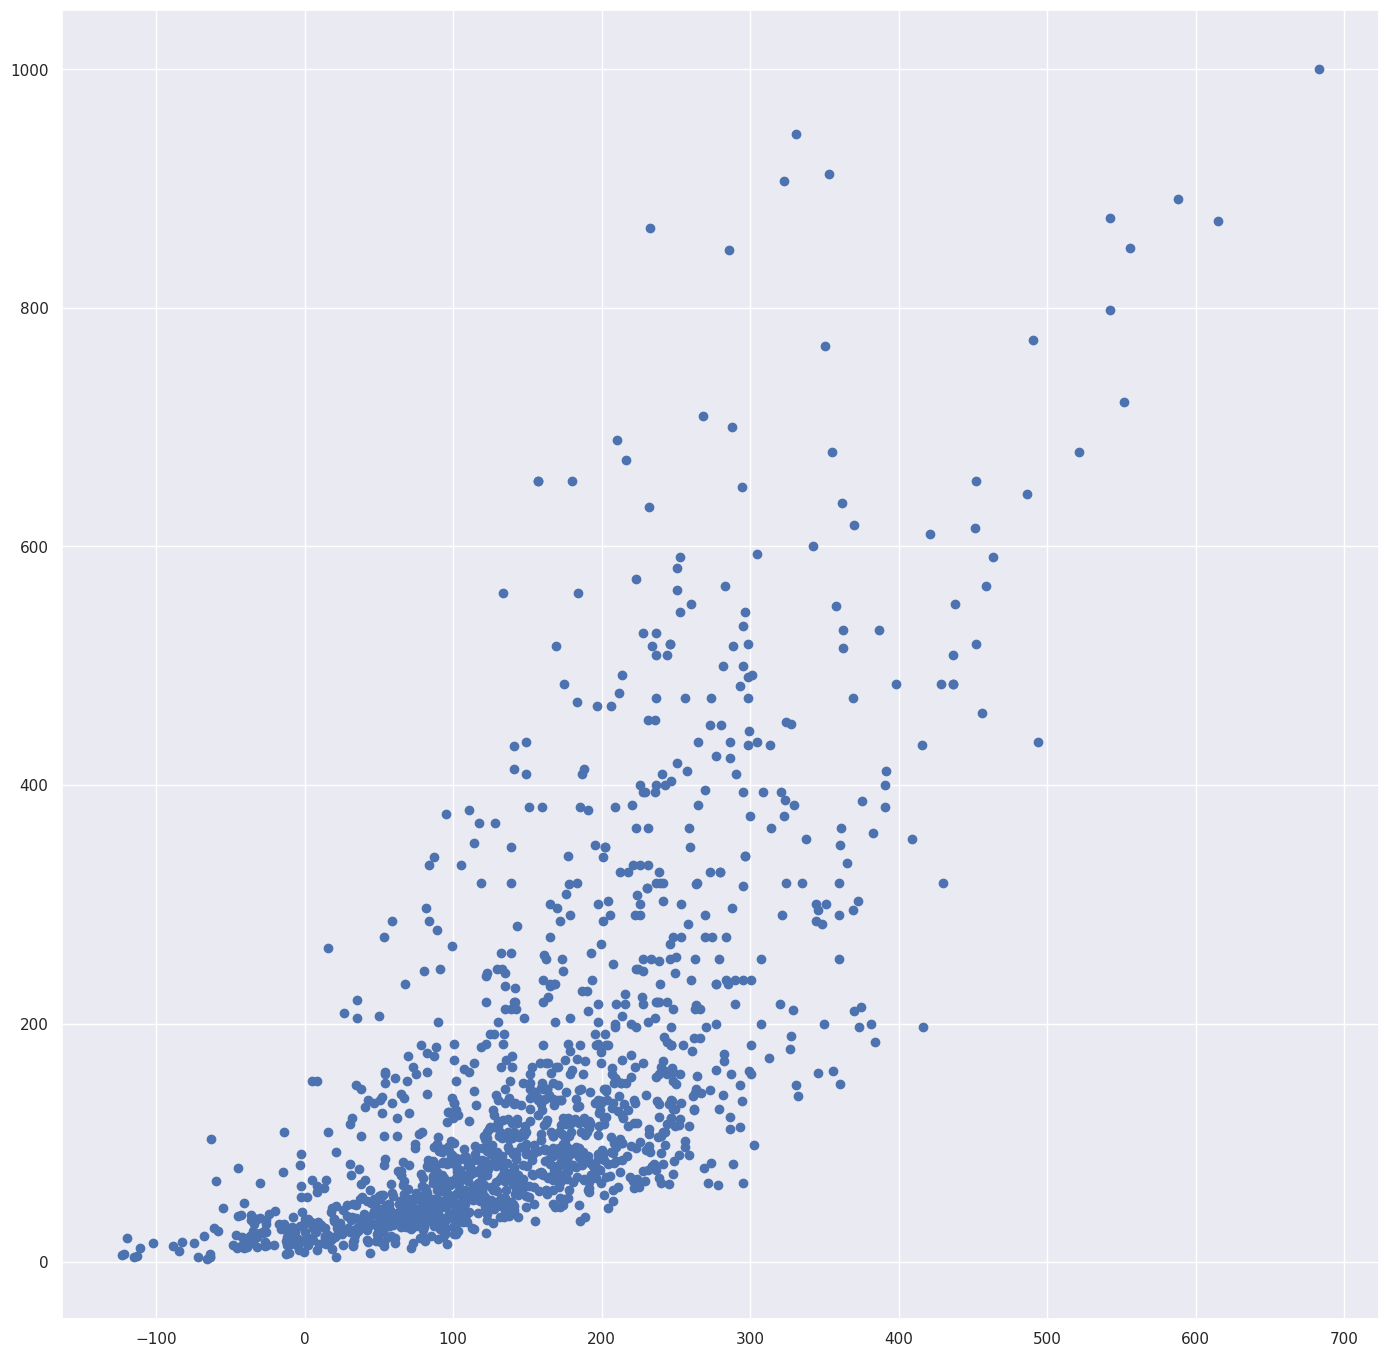

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(y_pred, yn_test)

plt.show()

# XGBOOST для нормализированных данных

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import plotly.express as px

In [ ]:
bst = XGBRegressor(n_estimators=100, max_depth=16, objective='reg:squarederror',eval_metric="rmse")

# fit model
bst.fit(Xn_train, yn_train)

predsgb = bst.predict(Xn_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(yn_test, predsgb, squared=False)
mae = mean_absolute_error(yn_test, predsgb)
# Рассчет MAPE
mape = np.mean((np.abs((yn_test - predsgb) / yn_test))) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
#39.87636376786854
#44.37471825067739

MAE: 39.13227015021217
MAPE: 38.88523414216572
RMSE: 68.57292485957204


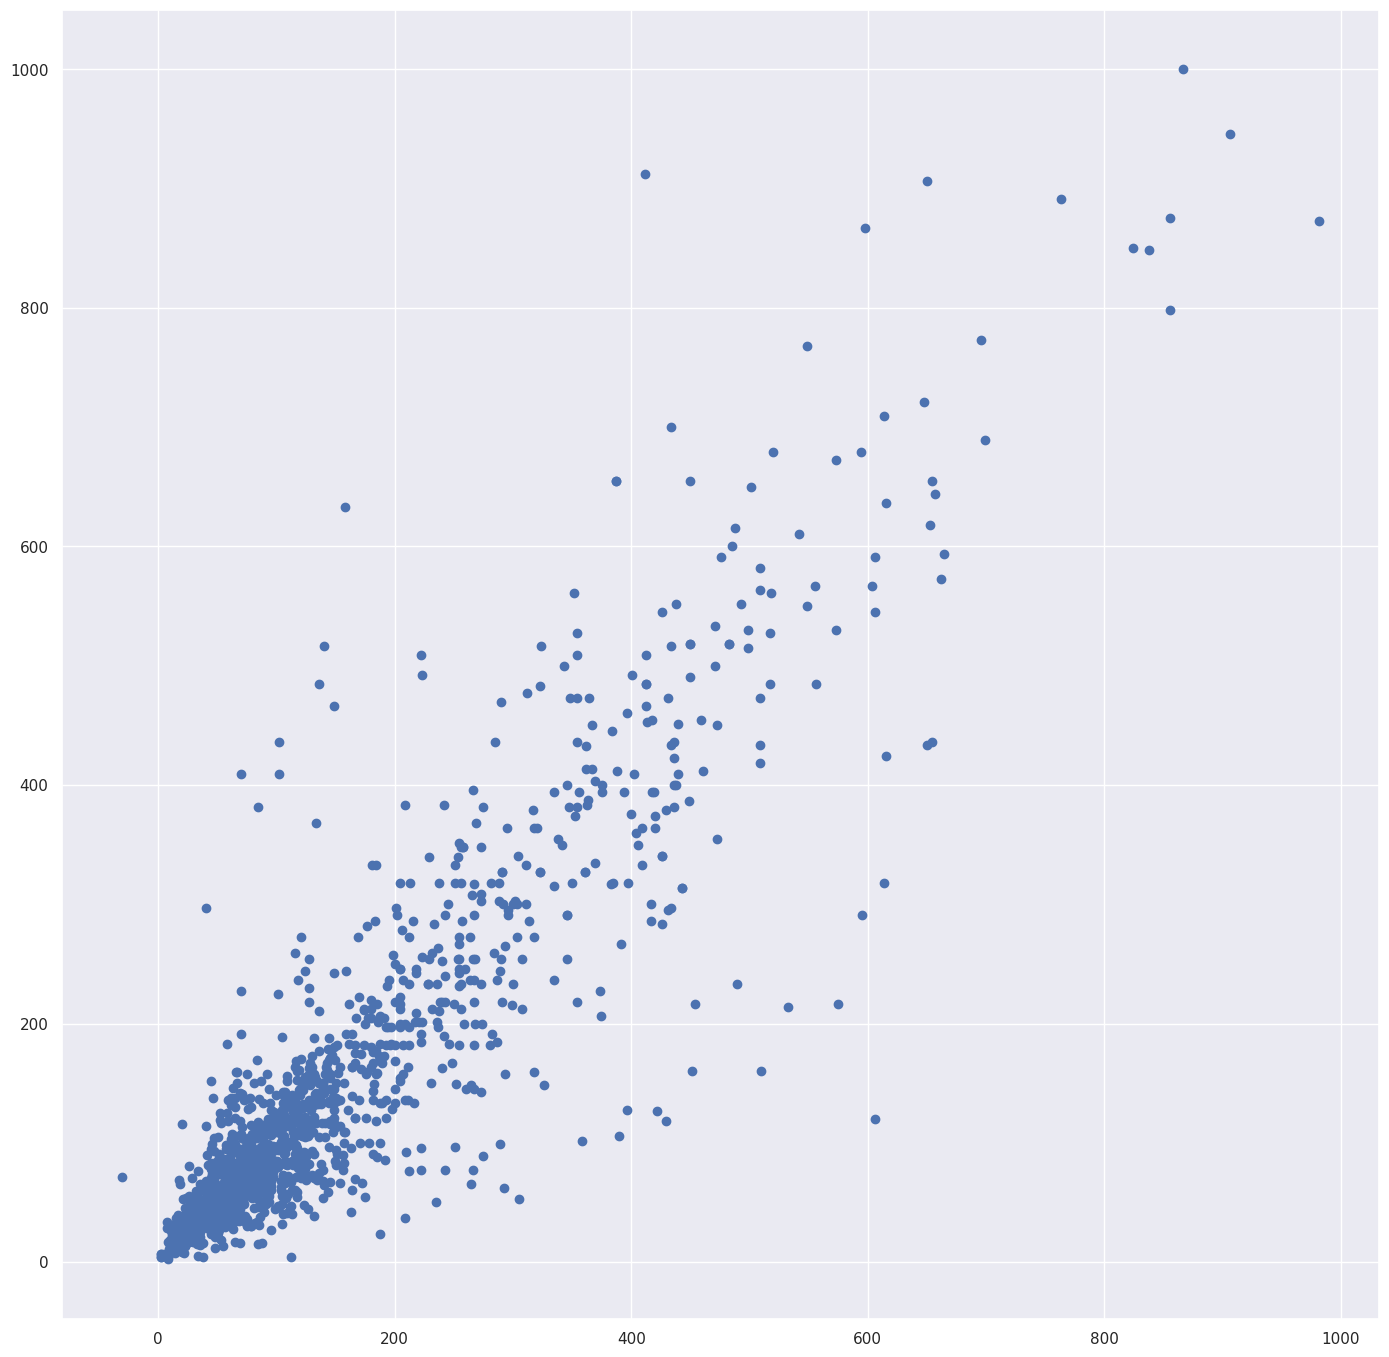

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predsgb, yn_test)

plt.show()

# Данные без "хвоста"

In [ ]:
halfdata = df2.copy()


In [ ]:
halfdata["Sales"] = halfdata["Total Sales"]
halfdata = halfdata.drop("Total Sales", axis=1)


In [ ]:
halfdata = halfdata[halfdata.Sales < 50000]
halfdata

,Price per Unit,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,...,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales
0,35.0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,21700.0
1,25.0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,18000.0
2,61.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,7320.0
3,43.0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1505.0
4,55.0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,45375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,32.0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,2176.0
9644,37.0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,259.0
9645,46.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,5750.0
9646,42.0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,8820.0


In [ ]:
import plotly.express as px
fig = px.histogram(halfdata, x="Sales", title="Distribution of sales")
fig.show()

In [ ]:

halfdata = halfdata.sample(frac=1).reset_index(drop=True)

# Линейная Регрессия для данных без хвоста

In [ ]:
Xl= halfdata.values[:,(0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]
Yl= halfdata.values[:, 21]


Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, Yl, test_size=0.15, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(Xl_train,yl_train)
yl_pred = lr.predict(Xl_test)
r2=r2_score(yl_test, yl_pred)
print(r2)

# Рассчет MSE
mse = np.mean((yl_test - yl_pred)**2)

# Рассчет MAPE
mape = np.mean(np.abs((yl_test - yl_pred)) / (yl_test)) * 100

print("MSE:", mse)
print("MAPE:", mape)
#80.82754325397129

0.4635679588405671
MSE: 58969841.68820824
MAPE: inf


<ipython-input-430-b33b4366fdc1>:11: RuntimeWarning:

divide by zero encountered in divide



# CATBOOST для данных без хвоста

In [ ]:
Xc= halfdata.values[:,(0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]
Yc= halfdata.values[:, 21]


Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, Yc, test_size=0.15, random_state=1)

In [ ]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(Xc_train, yc_train)
test_pool = Pool(Xc_test, yc_test)

# specify the training parameters
model = CatBoostRegressor(iterations=2500, loss_function='MAE', verbose=100)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predc = model.predict(test_pool)


0:	learn: 7217.8509083	total: 2.03ms	remaining: 5.08s
100:	learn: 4423.5585925	total: 178ms	remaining: 4.23s
200:	learn: 4082.8547235	total: 356ms	remaining: 4.07s
300:	learn: 3860.8444478	total: 535ms	remaining: 3.9s
400:	learn: 3655.0703607	total: 724ms	remaining: 3.79s
500:	learn: 3509.7467657	total: 905ms	remaining: 3.61s
600:	learn: 3393.9336038	total: 1.08s	remaining: 3.41s
700:	learn: 3297.6005674	total: 1.25s	remaining: 3.22s
800:	learn: 3227.4470739	total: 1.43s	remaining: 3.03s
900:	learn: 3169.8730396	total: 1.6s	remaining: 2.84s
1000:	learn: 3123.2261784	total: 1.79s	remaining: 2.67s
1100:	learn: 3076.0619951	total: 1.96s	remaining: 2.49s
1200:	learn: 3029.9041793	total: 2.13s	remaining: 2.3s
1300:	learn: 2996.0407237	total: 2.3s	remaining: 2.12s
1400:	learn: 2967.9199138	total: 2.47s	remaining: 1.94s
1500:	learn: 2933.6283275	total: 2.65s	remaining: 1.76s
1600:	learn: 2906.1807632	total: 2.83s	remaining: 1.59s
1700:	learn: 2882.0464036	total: 3s	remaining: 1.41s
1800:	lear

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(yc_test, predc, squared=False)
mae = mean_absolute_error(yc_test, predc)
# Рассчет MAPE
mape = np.mean((np.abs(yc_test - predc)) / (yc_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
#35.79969211069319
#34.65593904743338
#36.79607730978182

MAE: 3186.0251982682225
MAPE: inf
RMSE: 5460.195360888069


<ipython-input-433-4487eb18e922>:6: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
bias = calculate_bias(predc, yc_test)
print("BIAS данных:", bias)

BIAS данных: -456.25917441303045


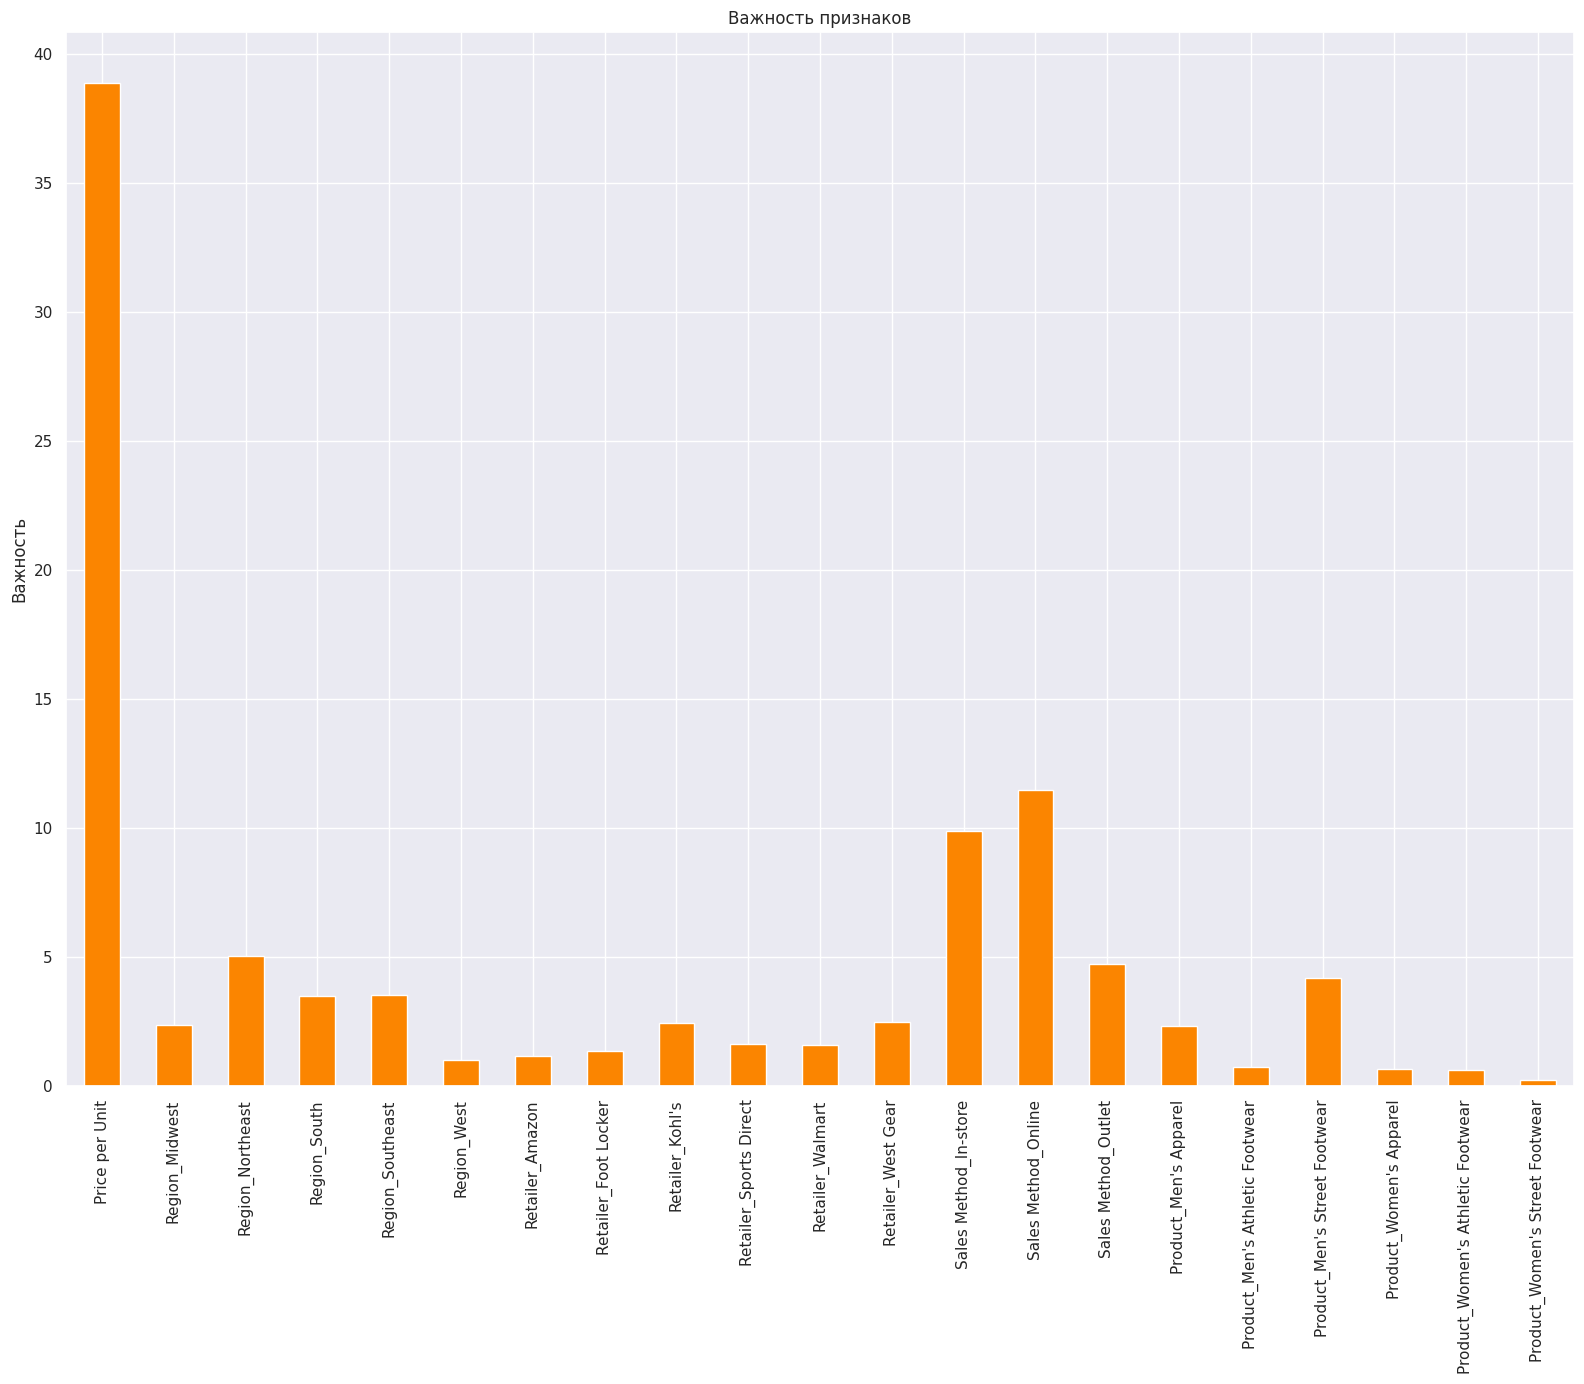

In [ ]:
sk = pd.Series(model.feature_importances_,(df2.drop("Total Sales", axis=1)).columns)

fig, ax = plt.subplots(figsize=(16,14))
sk.plot.bar(ax=ax, color="#FB8500")
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

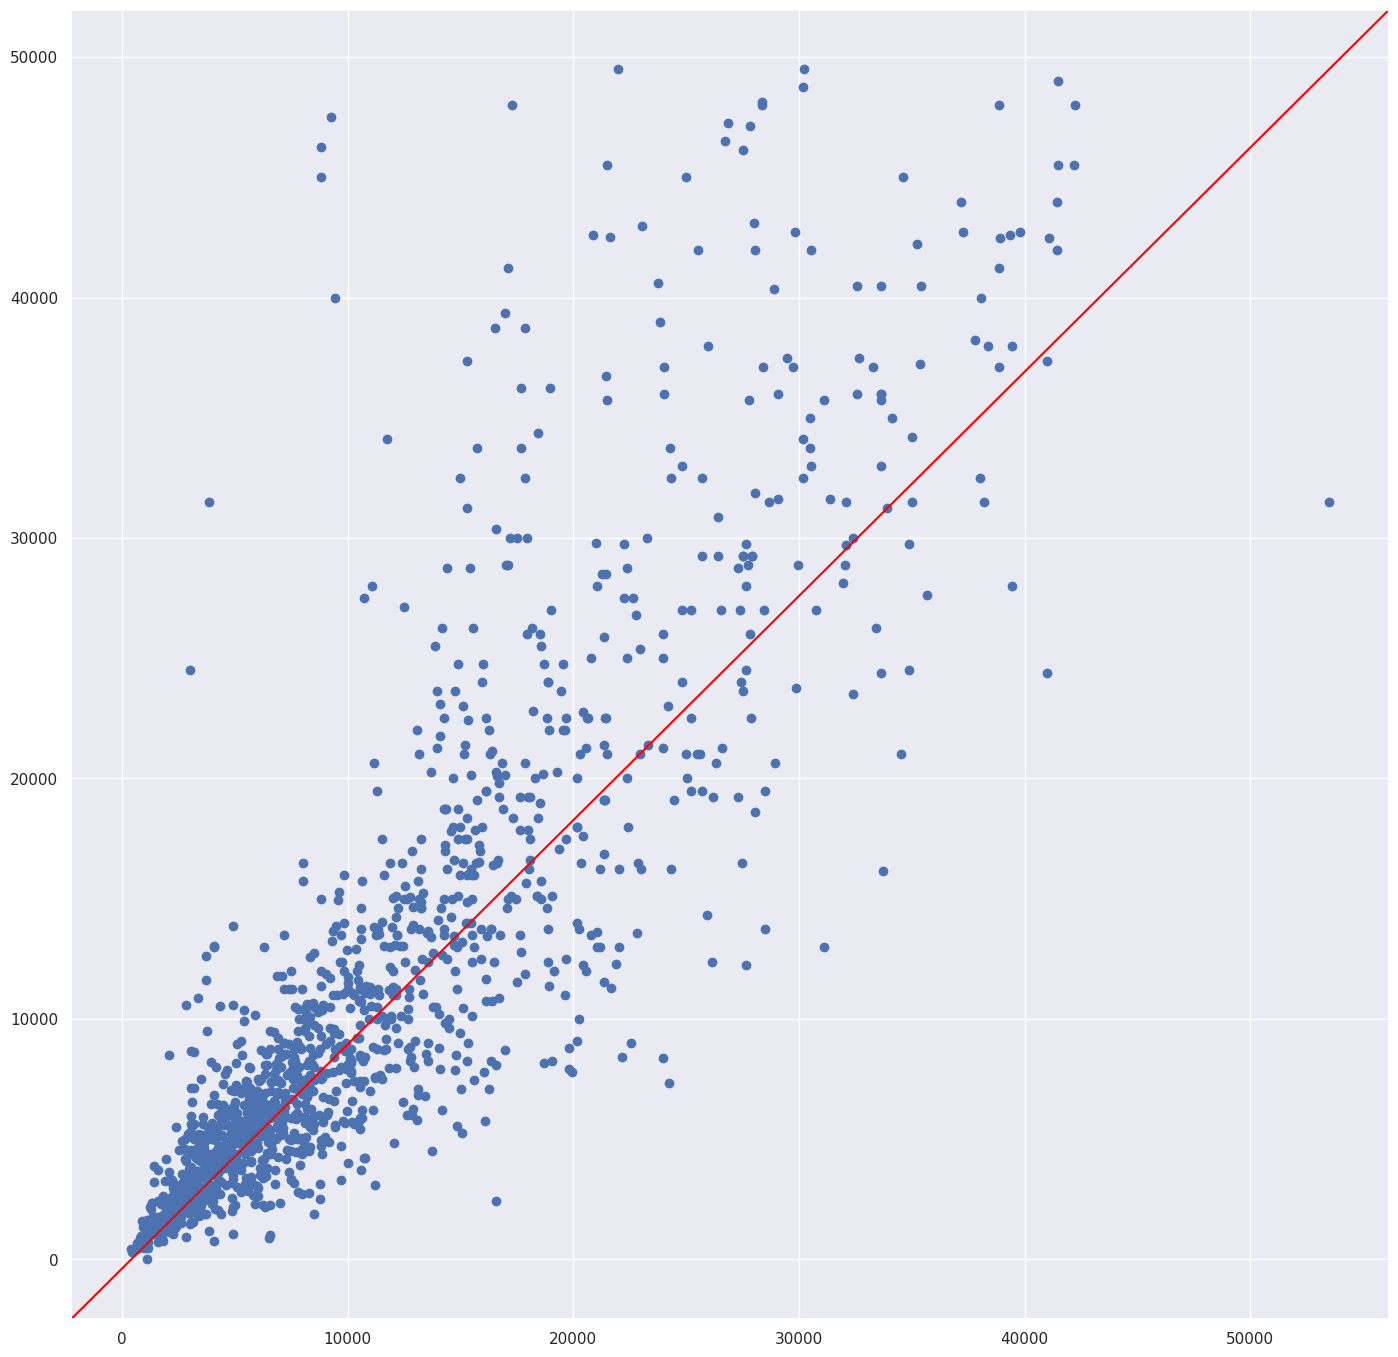

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predc,yc_test)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

# XGBOOST для данных без хвоста

In [ ]:
Xgb= halfdata.values[:,(0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]
Ygb= halfdata.values[:, 21]


Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, Ygb, test_size=0.15, random_state=1)

In [ ]:
bst = XGBRegressor(n_estimators=100, max_depth=16, objective='reg:squarederror',eval_metric="rmse")

# fit model
bst.fit(Xgb_train, ygb_train)

predgb = bst.predict(Xgb_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ygb_test, predgb, squared=False)
mae = mean_absolute_error(ygb_test, predgb)
# Рассчет MAPE
mape = np.mean((np.abs(ygb_test - predgb)) / (ygb_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
#44.70118629075763
#42.76377150295522

MAE: 3187.574861021008
MAPE: inf
RMSE: 5457.006404009666


<ipython-input-439-b5a0fcffe6a7>:6: RuntimeWarning:

divide by zero encountered in divide



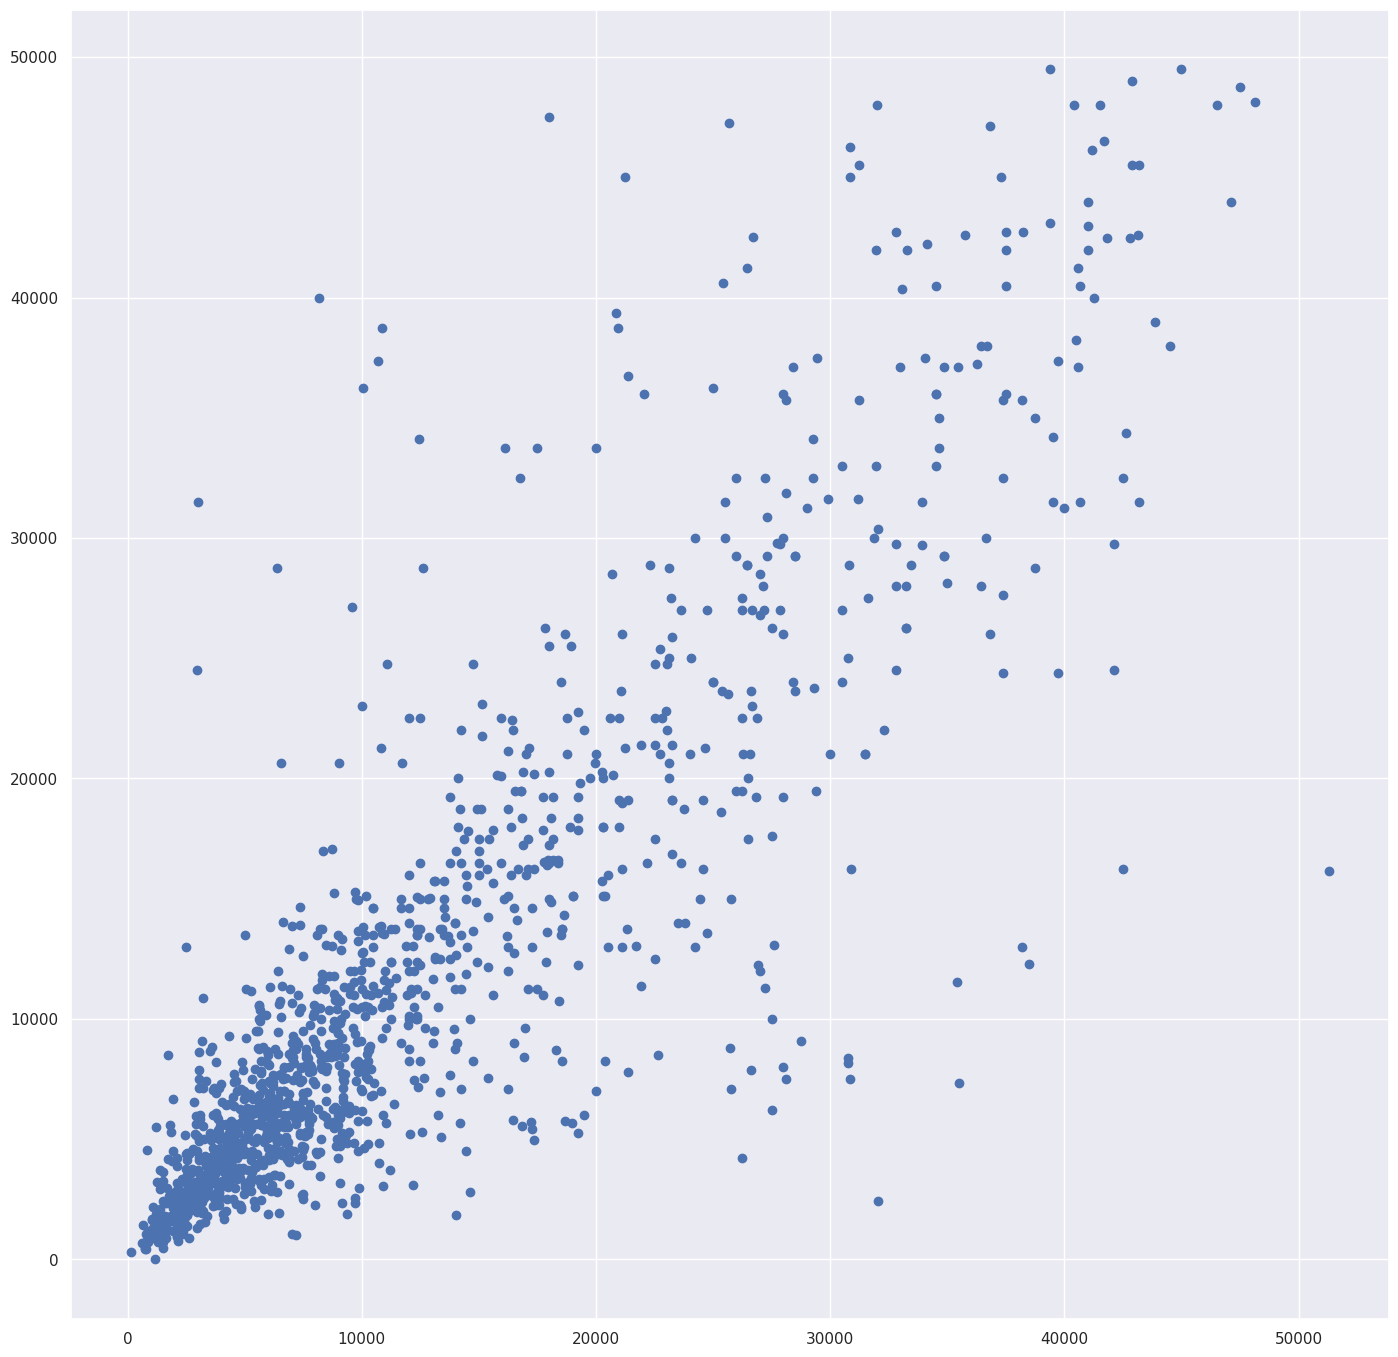

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predgb,ygb_test)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bbb0613e-2f22-4925-8a20-4af8834a2a03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>